# Feature Engineering Notebook

## Objectives

*   Engineer features for Classification, Regression and Cluster models


## Inputs

* outputs/datasets/cleaned/TrainSet.csv
* ouputs/datasets/cleaned/TestSet.csv

## Outputs

* generate a list with variables to engineer

## Conclusions



* Feature Engineering Transformers
  * Ordinal categorical encoding: `[KitchenQual, 'MasVnrArea','GarageYrBlt','GarageFinish']`
  * Smart Correlation Selection: `[]`
  


---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/HeritageHousing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/HeritageHousing'

---

# Load Cleaned Data

Train Set

In [5]:
import pandas as pd
TrainSet = pd.read_csv('outputs/datasets/cleaned/TrainSet.csv')
TrainSet

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0         1828       0.0           3.0           Av          48    No Record   
1          894       0.0           2.0           No           0          Unf   
2          964       0.0           2.0           No         713          ALQ   
3         1689       0.0           3.0           No        1218          GLQ   
4         1541       0.0           3.0           No           0          Unf   
...        ...       ...           ...          ...         ...          ...   
1163      1268    1097.0           3.0           Mn        1163          GLQ   
1164      1067       0.0           2.0           No         442          BLQ   
1165      1318     584.0           4.0         None           0         None   
1166      1557       0.0           2.0           Gd           0          Unf   
1167      1195     644.0           4.0           No           0          Unf   

      BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea  \
0          1774         774          Unf       2007.0  ...    11694   
1           894         308    No Record       1962.0  ...     6600   
2           163         432          Unf       1921.0  ...    13360   
3           350         857          RFn       2002.0  ...    13265   
4          1541         843          RFn       2001.0  ...    13704   
...         ...         ...          ...          ...  ...      ...   
1163         89         856    No Record       1999.0  ...     9430   
1164        625         436          Unf       1996.0  ...     9600   
1165          0         539          Unf       1978.0  ...     8930   
1166       1374         420          Fin       2003.0  ...     3196   
1167       1195         486          Fin       1998.0  ...    16770   

     LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0           90.0       452.0          108            5            9   
1           60.0         0.0            0            5            5   
2           80.0         0.0            0            7            5   
3           69.0       148.0           59            5            8   
4          118.0       150.0           81            5            7   
...          ...         ...          ...          ...          ...   
1163        82.0       673.0          128            5            8   
1164        60.0         0.0            0            7            4   
1165        68.0         0.0            0            5            6   
1166        69.0        18.0           20            5            7   
1167        58.0        30.0           81            5            7   

      TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0            1822       2007          2007     314813  
1             894       1962          1962     109500  
2             876       1921          2006     163500  
3            1568       2002          2002     271000  
4            1541       2001          2002     205000  
...           ...        ...           ...        ...  
1163         1252       1999          1999     337000  
1164         1067       1950          1995     128000  
1165            0       1978          1978     112000  
1166         1374       2003          2004     234000  
1167         1195       1998          1998     221000  

[1168 rows x 22 columns]

Test Set

In [6]:
TestSet = pd.read_csv('outputs/datasets/cleaned/TestSet.csv')
TestSet.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      2515       0.0           4.0           No        1219          Rec   
1       958     620.0           3.0           No         403          BLQ   
2       979     224.0           3.0           No         185          LwQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        816         484    No Record       1975.0  ...    32668        69.0   
1        238         240          Unf       1941.0  ...     9490        79.0   
2        524         352          Unf       1950.0  ...     7015        69.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0         0.0            0            3            6         2035       1957   
1         0.0            0            7            6          806       1941   
2       161.0            0            4            5          709       1950   

   YearRemodAdd  SalePrice  
0          1975     200624  
1          1950     133000  
2          1950     110000  

[3 rows x 22 columns]

# Data Exploration

In feature engineering, you are interested to evaluate which potential transformation you could do in your variables
* Take your notes in your separate spreadsheet

In [8]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Engineering

## Custom function

We studied this custom function in the feature-engine lesson. That will help you with the feature engineering process.
* Do not worry if you need help understanding the full code at first, as it is expected you will take some time to absorb the use case.
* At this moment, what matters is to understand the function objective and how you can use it.

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')


def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like ydata-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', 
                        variables=[f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


## Feature Engineering Spreadsheet Summary

* Consider the notes taken in your spreadsheet summary. List the transformers you will use
    * Categorical Encoding
    * Numerical Transformation
    * Smart Correlation Selection

## Dealing with Feature Engineering

### Categorical Encoding - Ordinal: replaces categories with ordinal numbers 

* Step 1: Select variable(s)

In [9]:
variables_engineering= ['KitchenQual', 'GarageFinish', 'BsmtFinType1', 'BsmtExposure']

variables_engineering

['KitchenQual', 'GarageFinish', 'BsmtFinType1', 'BsmtExposure']

* Step 2: Create a separate DataFrame, with your variable(s)

In [9]:
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head(3)

KitchenQual GarageFinish BsmtFinType1 BsmtExposure
0          Gd          Unf    No Record           Av
1          TA    No Record          Unf           No
2          TA          Unf          ALQ           No

* Step 3: Create engineered variables(s) by applying the transformation(s), assess engineered variables distribution and select the most suitable method for each variable.

* Variable Analyzed: KitchenQual
* Applied transformation: ['KitchenQual_ordinal_encoder'] 



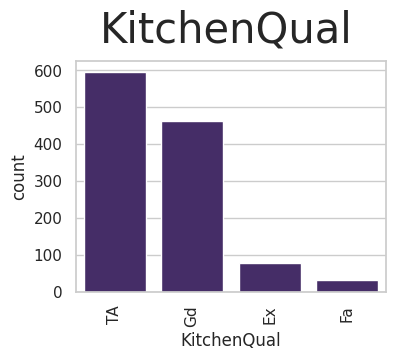

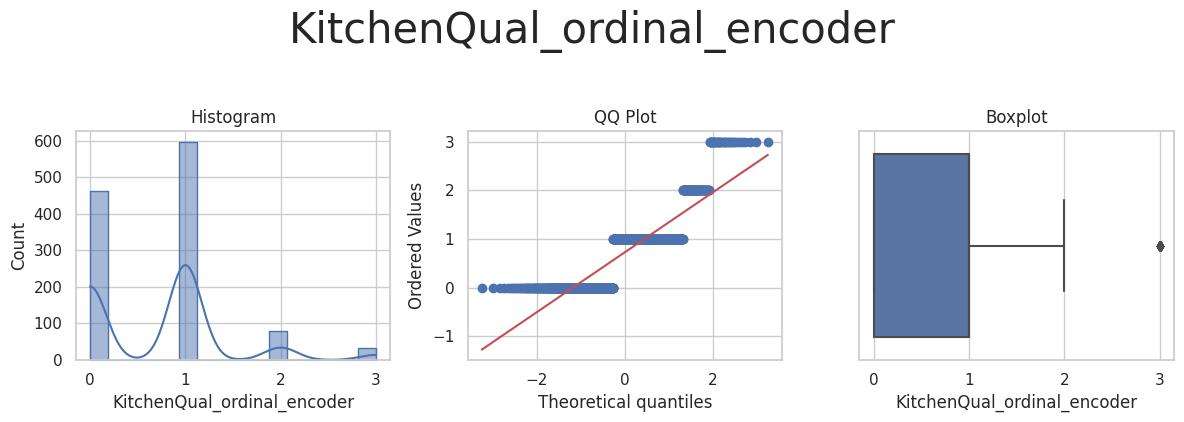



* Variable Analyzed: GarageFinish
* Applied transformation: ['GarageFinish_ordinal_encoder'] 



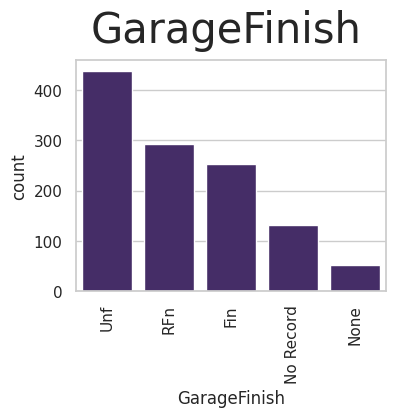

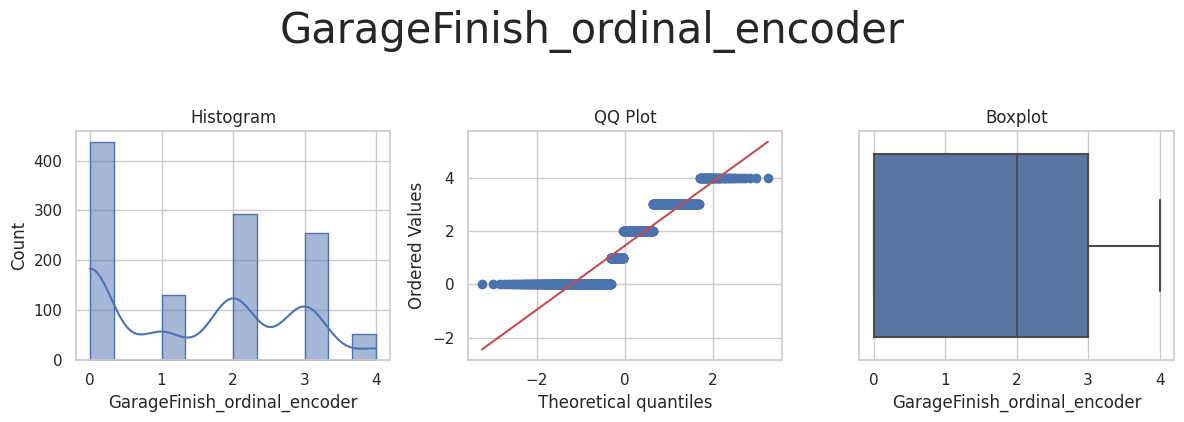



* Variable Analyzed: BsmtFinType1
* Applied transformation: ['BsmtFinType1_ordinal_encoder'] 



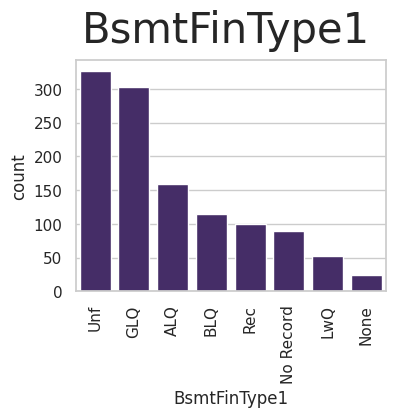

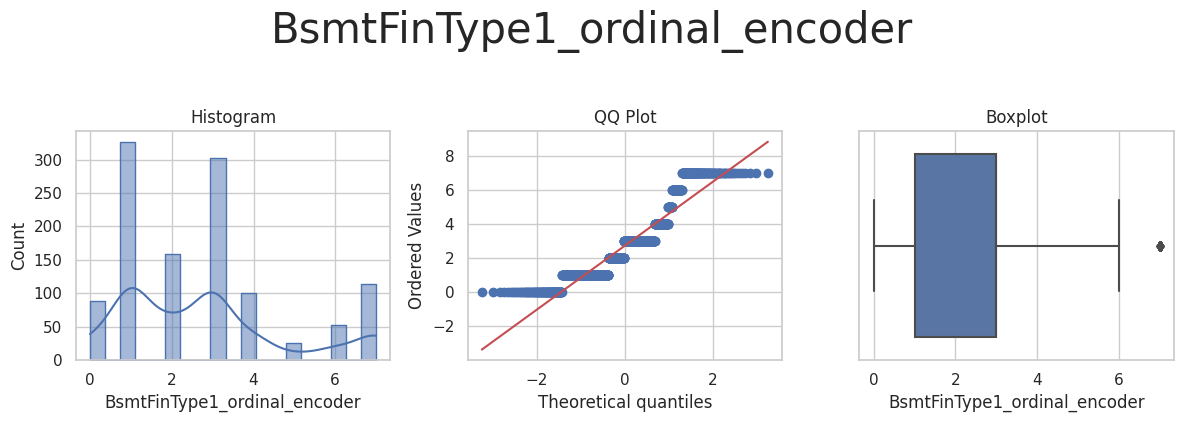



* Variable Analyzed: BsmtExposure
* Applied transformation: ['BsmtExposure_ordinal_encoder'] 



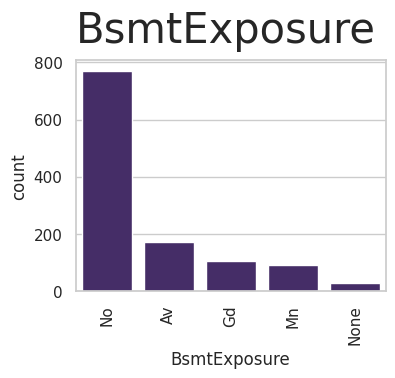

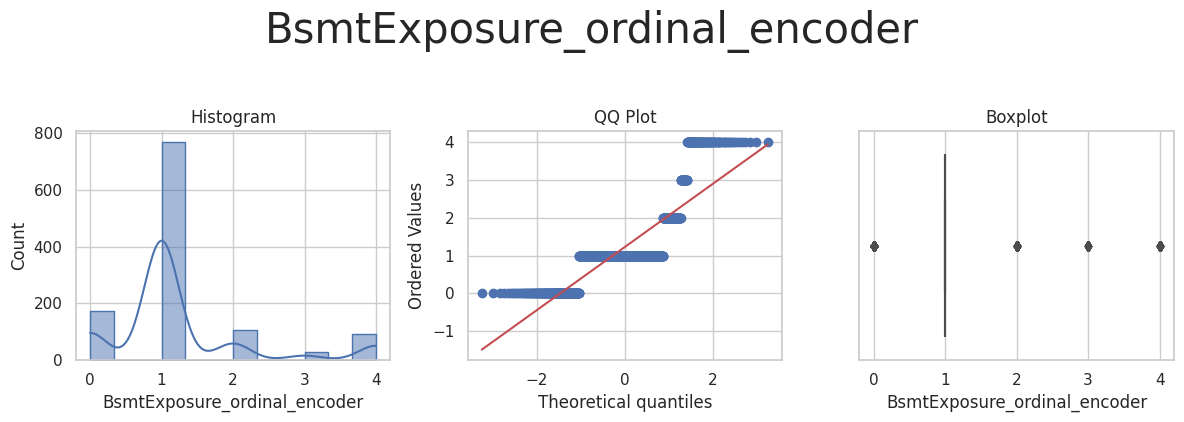

In [10]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='ordinal_encoder')

* For each variable, write your conclusion on how the transformation(s) look(s) to be effective.
  * For all variables, the transformation is effective, since it converted categories to numbers.



* Step 4 - Apply the selected transformation to the Train and Test set

In [12]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables=variables_engineering)
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

print("* Categorical encoding - ordinal transformation done!")

* Categorical encoding - ordinal transformation done!


### Numerical Transformation

* Step 1: Select variable(s)

In [12]:
variables_engineering = ['1stFlrSF', 'GrLivArea', 'LotArea', 'LotFrontage']
variables_engineering

['1stFlrSF', 'GrLivArea', 'LotArea', 'LotFrontage']

* Step 2: Create a separate DataFrame, with your variable(s)

In [13]:
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head(20)

1stFlrSF  GrLivArea  LotArea  LotFrontage
0       1828       1828    11694         90.0
1        894        894     6600         60.0
2        964        964    13360         80.0
3       1689       1689    13265         69.0
4       1541       1541    13704        118.0
5       1221       1221     7500         62.0
6       1324       1324     8658         84.0
7        696       1416     2572         24.0
8        526        988     1596         21.0
9        869       1218     6000         60.0
10       760       1656     6931         60.0
11      1362       1362     7577         61.0
12      1051       1839     7700         70.0
13      1375       1375    11310         75.0
14      1122       1122    12000        100.0
15      1432       1432    16157         69.0
16       728       1456     9018         65.0
17      1217       1217     9947         69.0
18      1040       1040     7200         60.0
19       612       1224     3000         30.0

* Step 3: Create engineered variables(s) by applying the transformation(s), assess engineered variables distribution and select the most suitable method

* Variable Analyzed: 1stFlrSF
* Applied transformation: ['1stFlrSF_log_e', '1stFlrSF_log_10', '1stFlrSF_reciprocal', '1stFlrSF_power', '1stFlrSF_box_cox', '1stFlrSF_yeo_johnson'] 



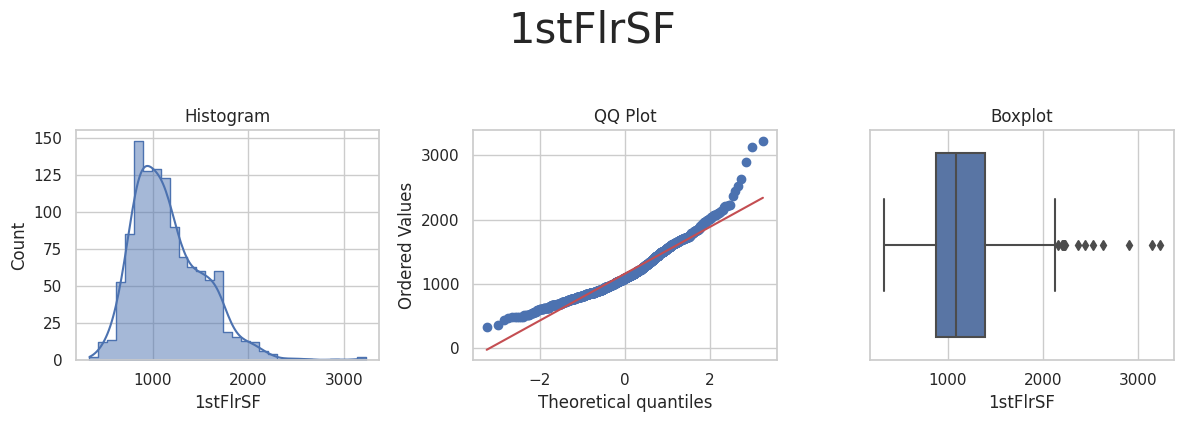

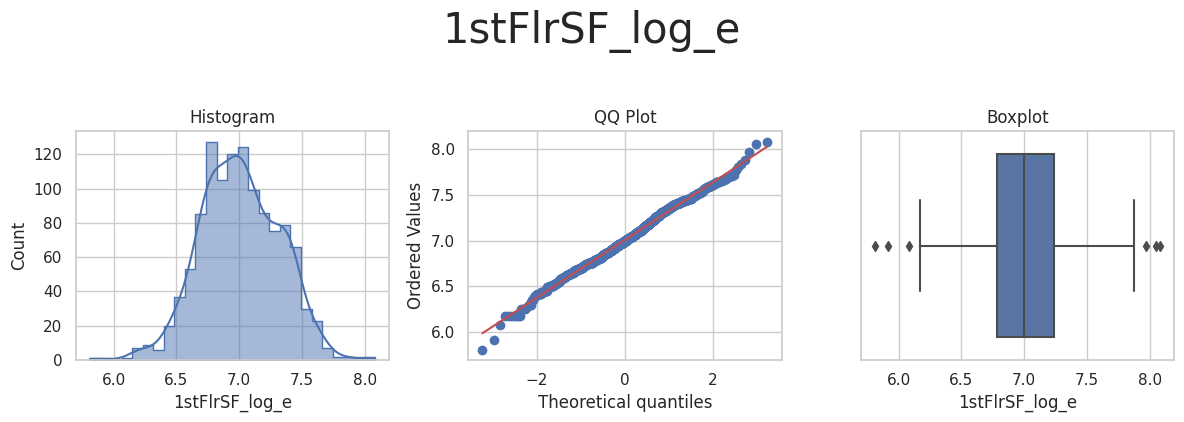

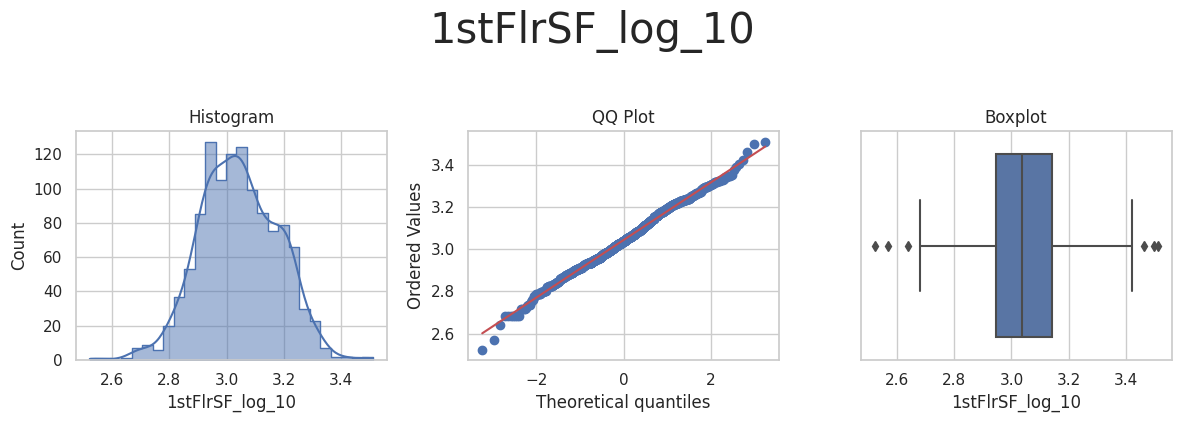

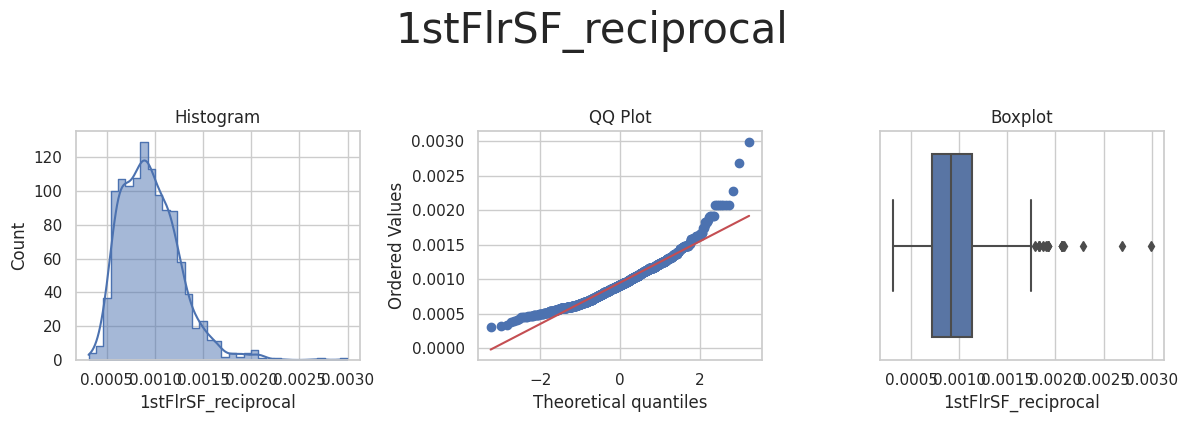

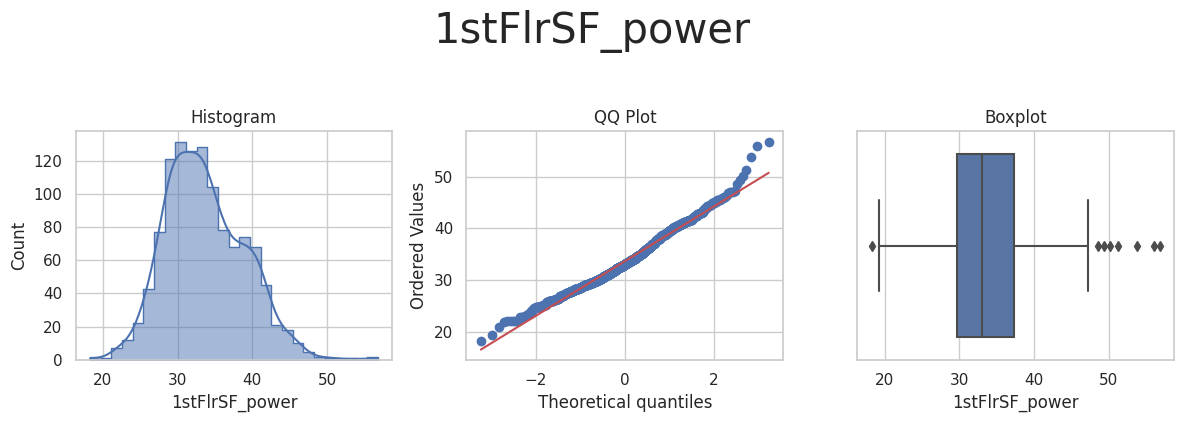

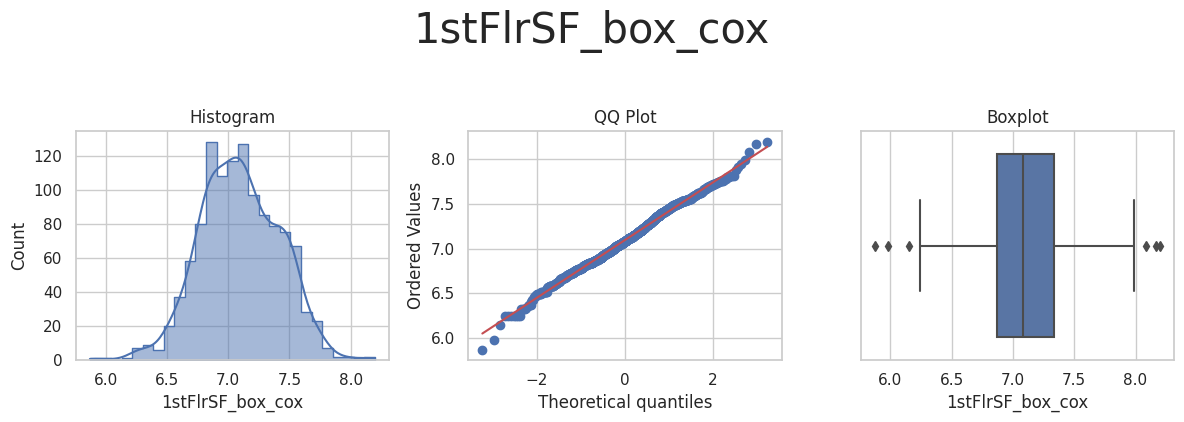

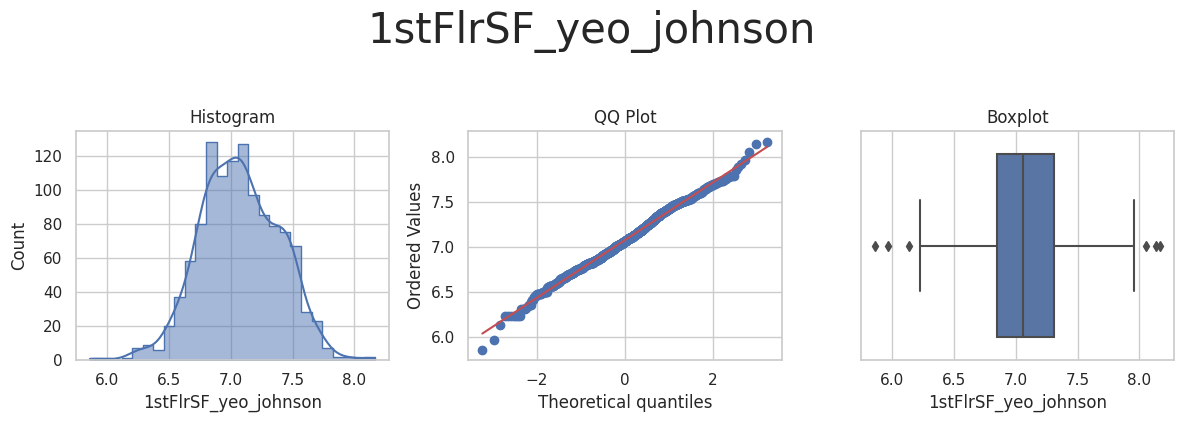



* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_log_e', 'GrLivArea_log_10', 'GrLivArea_reciprocal', 'GrLivArea_power', 'GrLivArea_box_cox', 'GrLivArea_yeo_johnson'] 



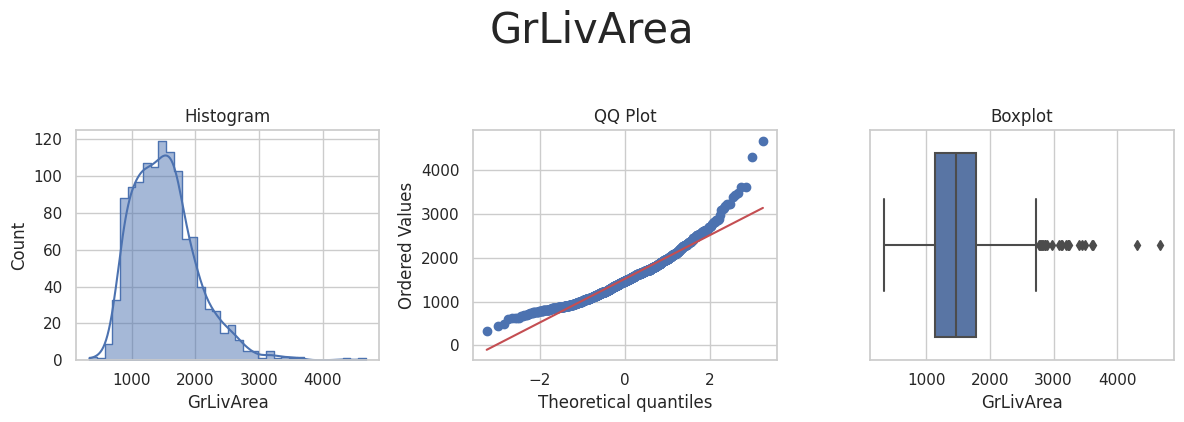

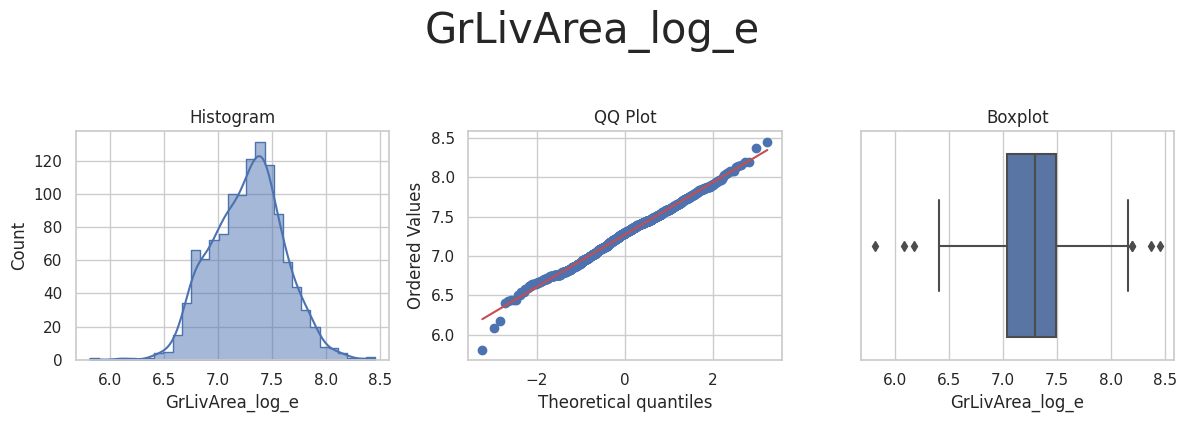

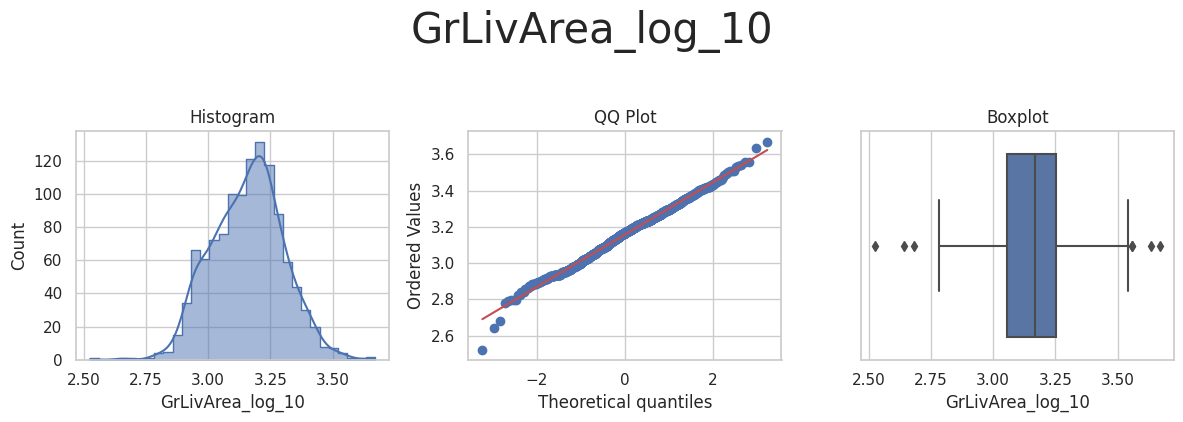

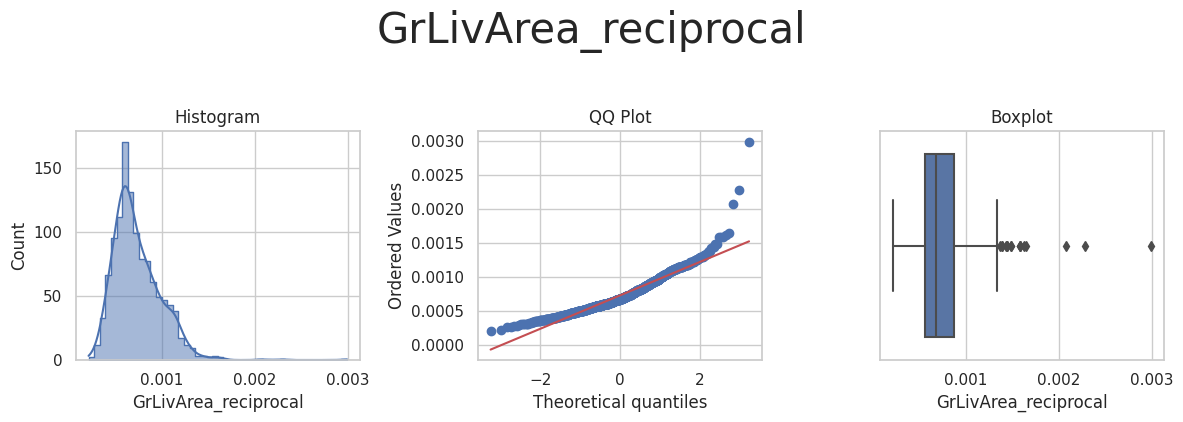

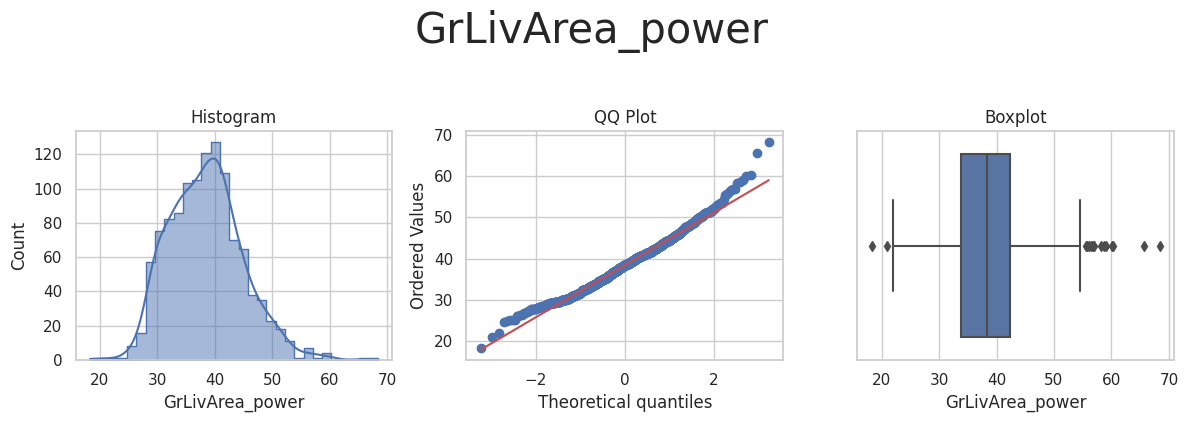

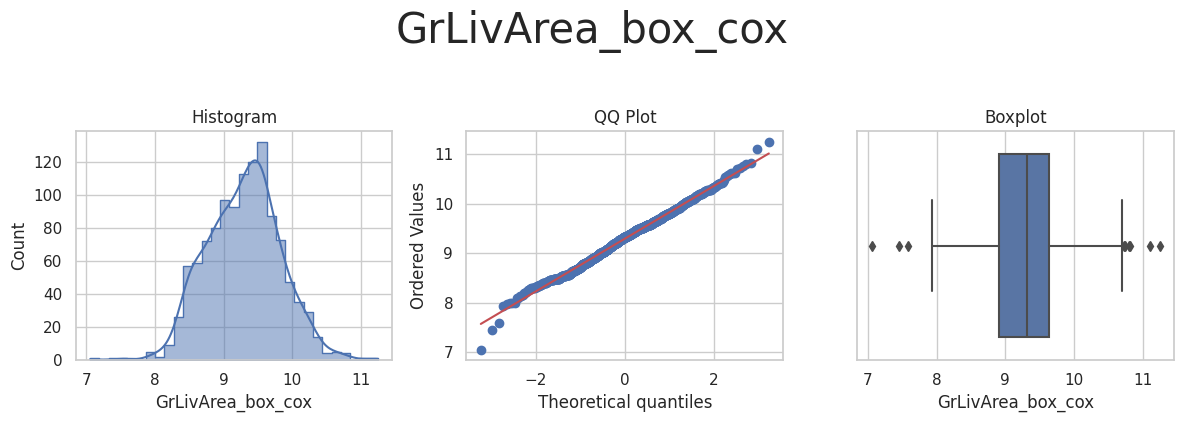

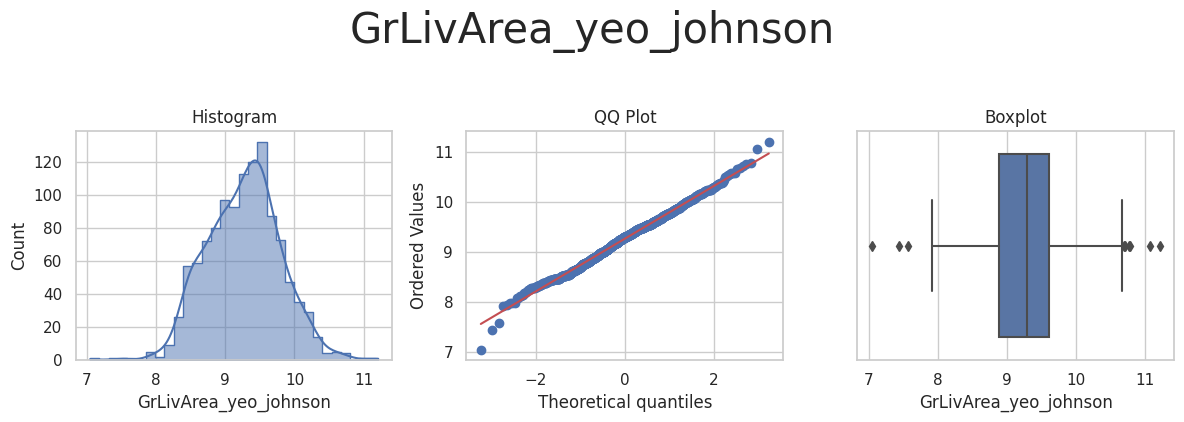



* Variable Analyzed: LotArea
* Applied transformation: ['LotArea_log_e', 'LotArea_log_10', 'LotArea_reciprocal', 'LotArea_power', 'LotArea_box_cox', 'LotArea_yeo_johnson'] 



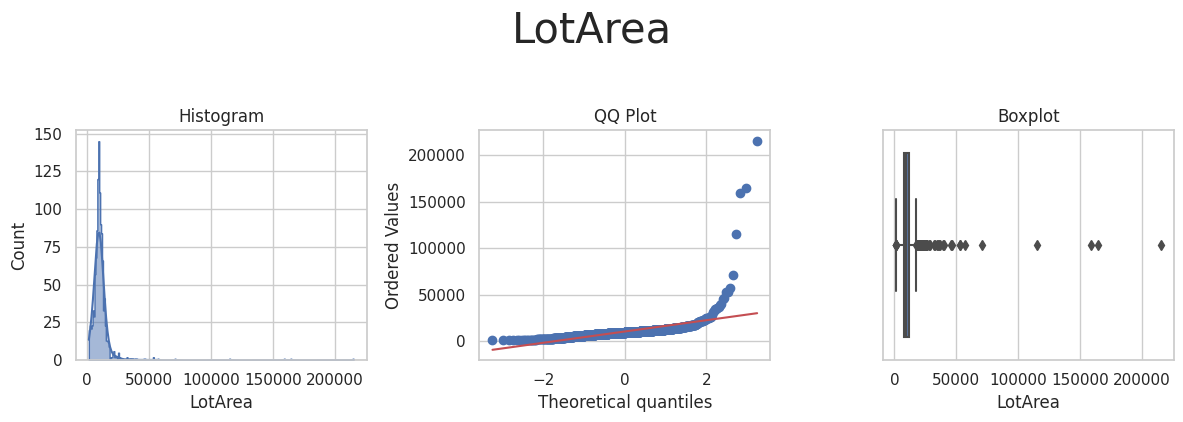

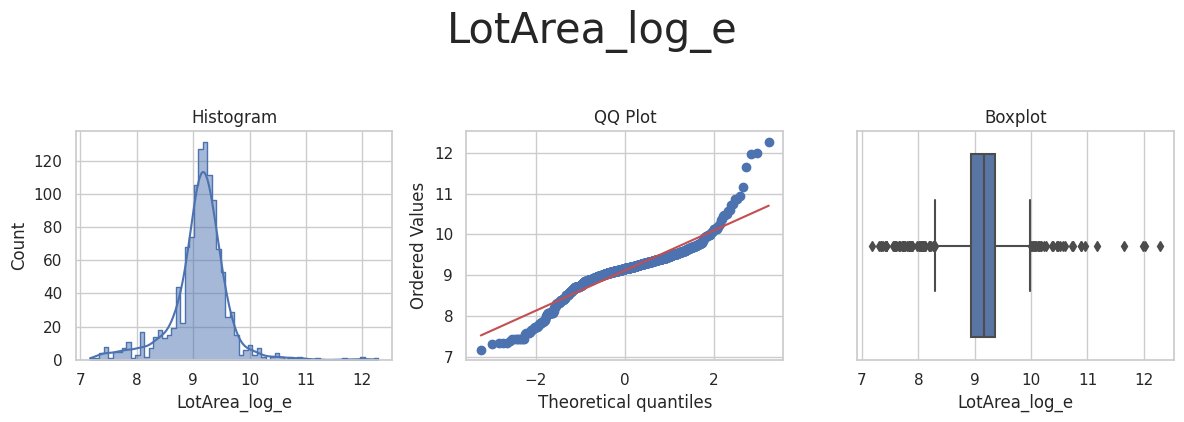

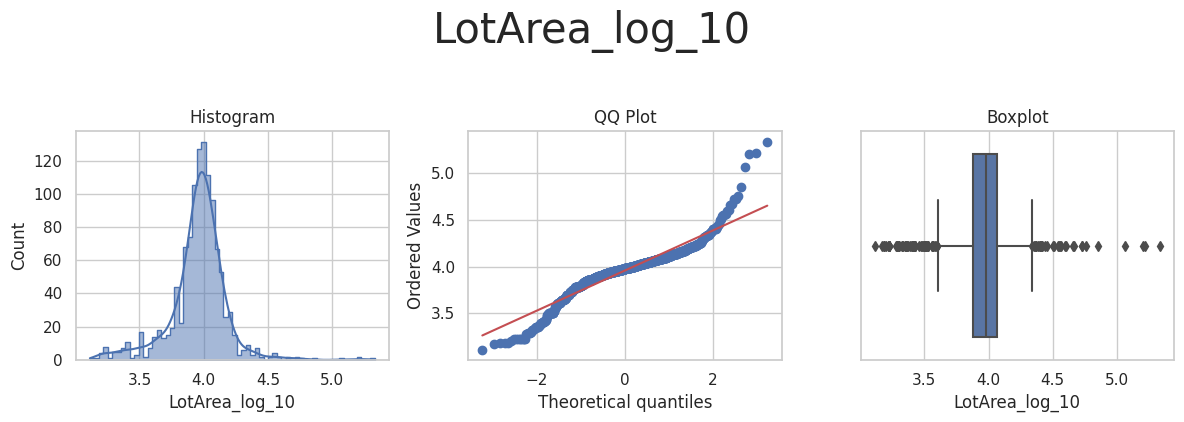

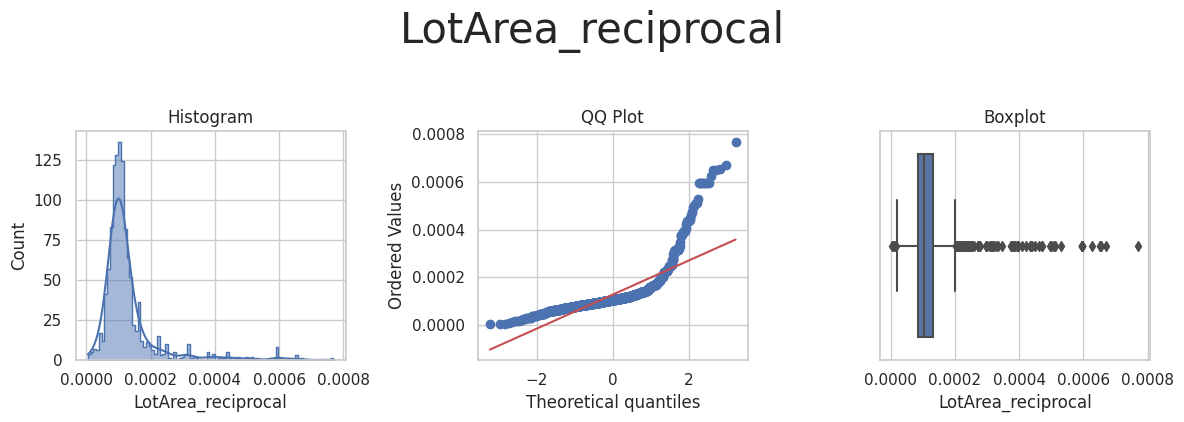

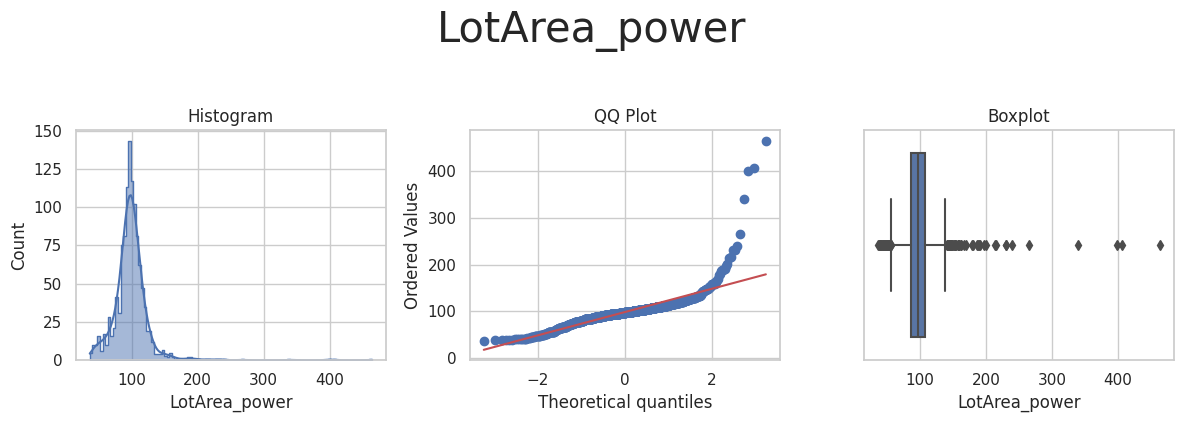

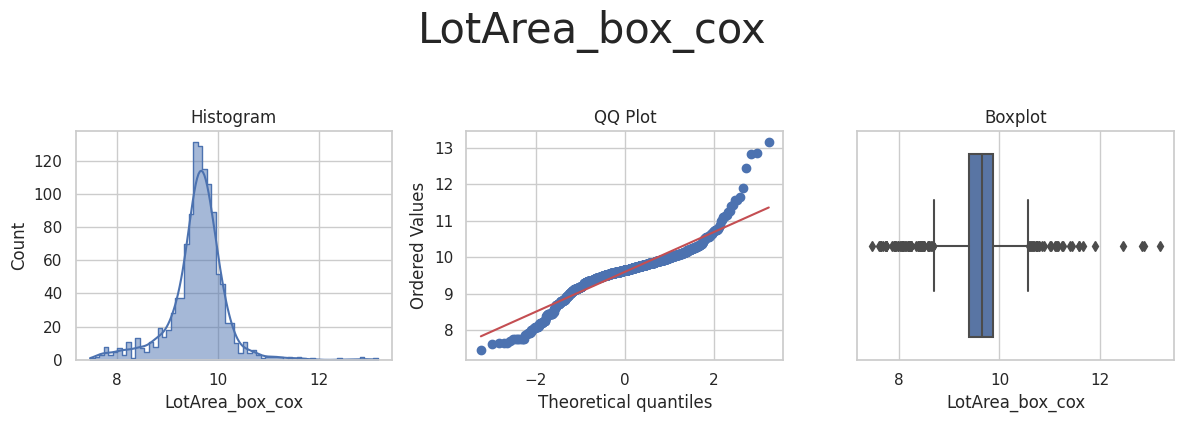

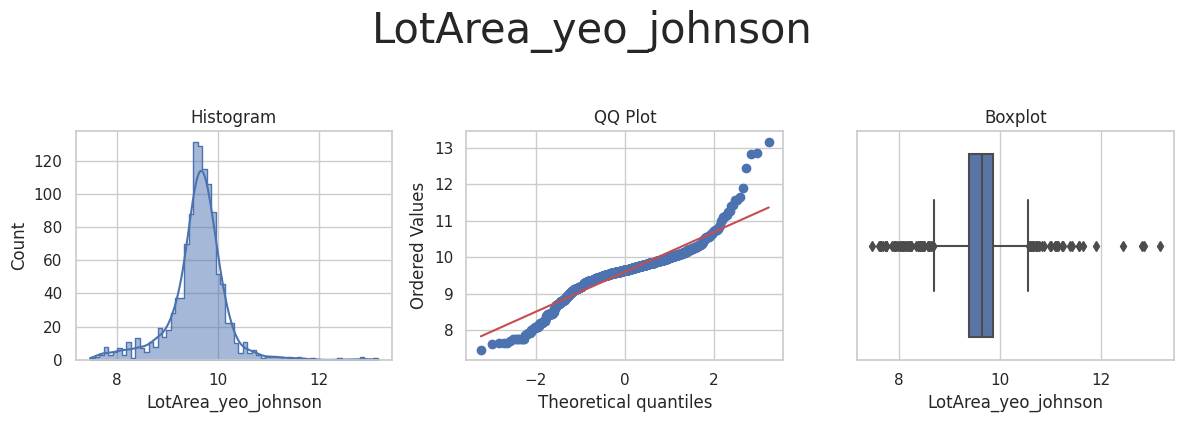



* Variable Analyzed: LotFrontage
* Applied transformation: ['LotFrontage_log_e', 'LotFrontage_log_10', 'LotFrontage_reciprocal', 'LotFrontage_power', 'LotFrontage_box_cox', 'LotFrontage_yeo_johnson'] 



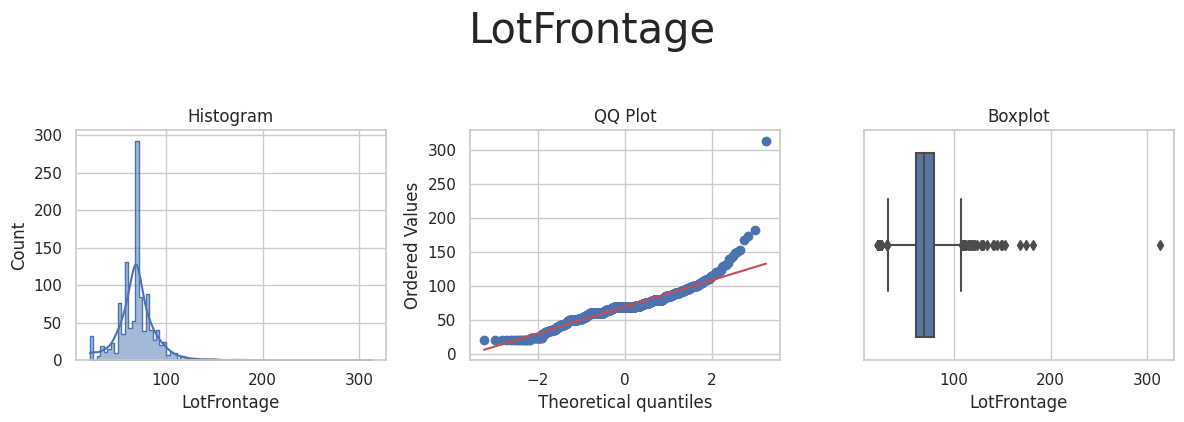

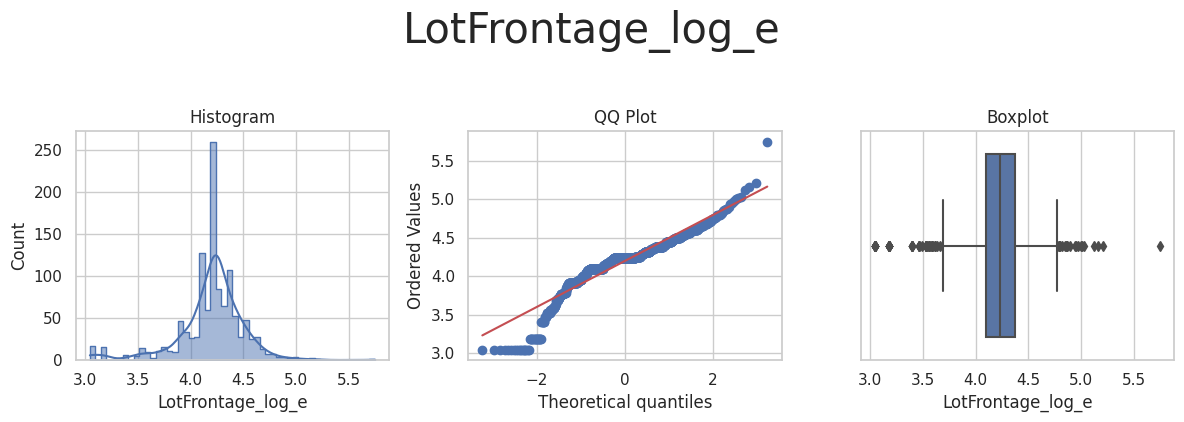

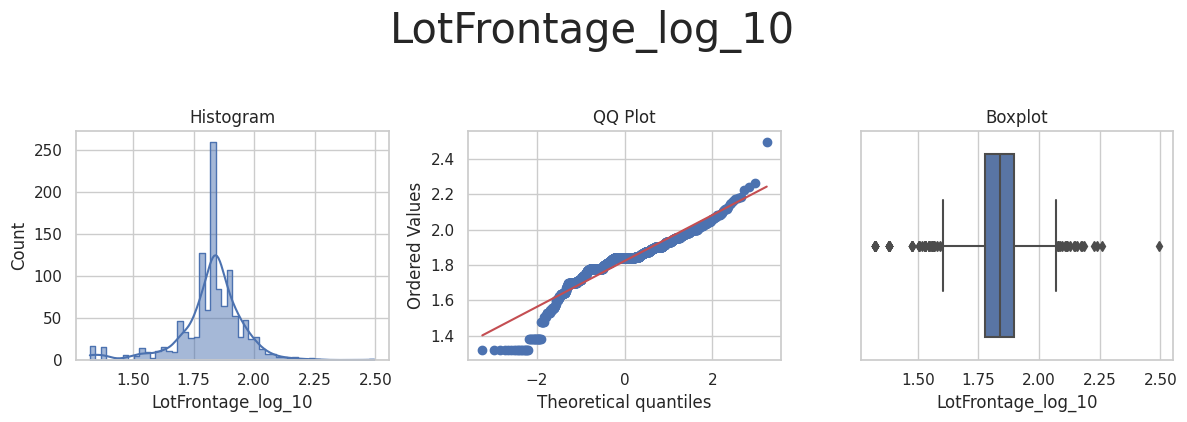

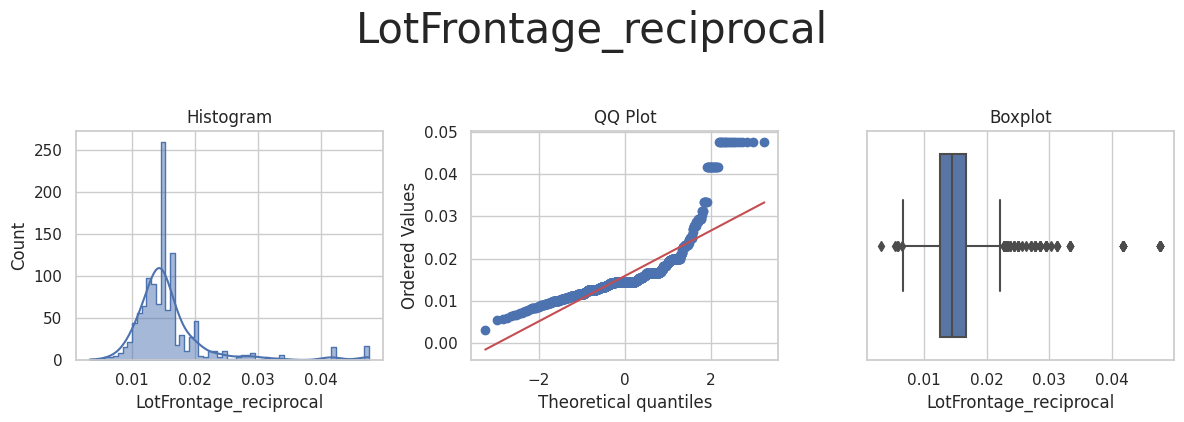

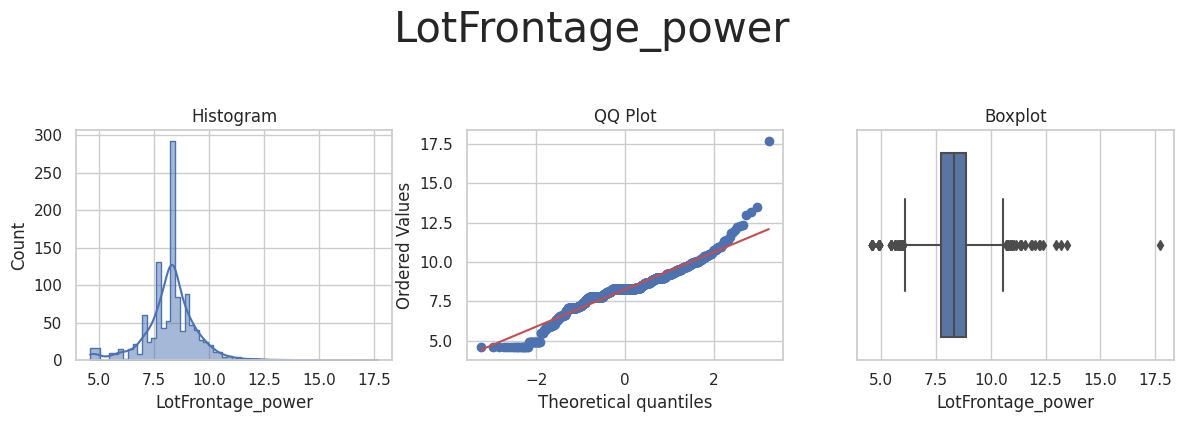

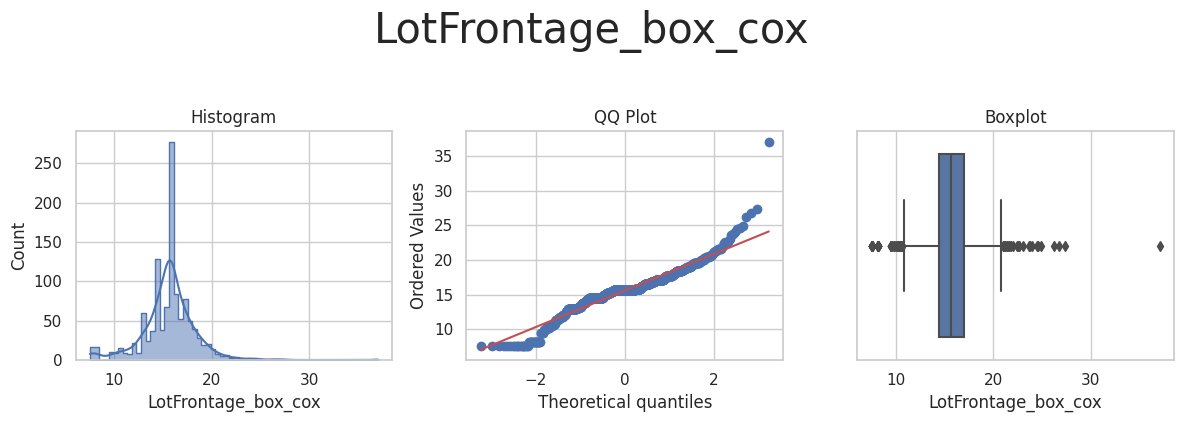

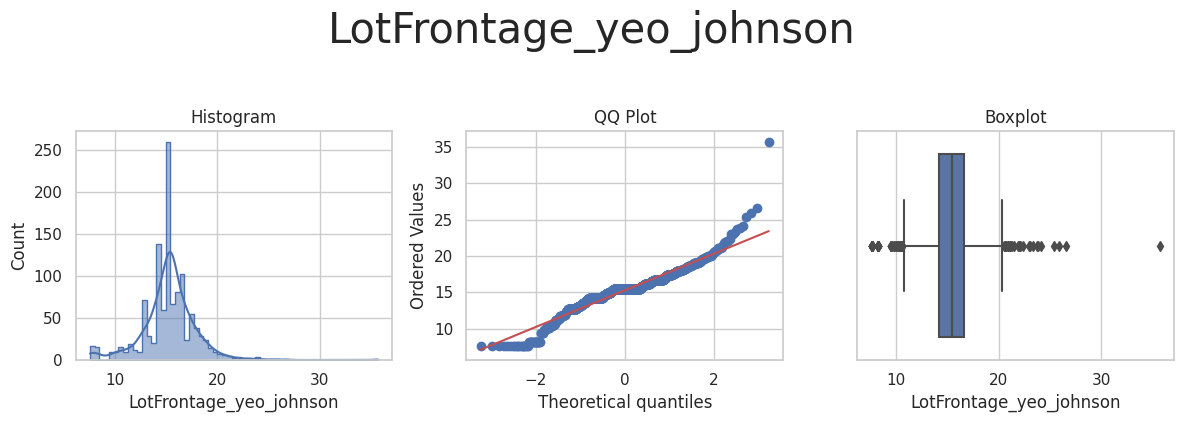

In [14]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='numerical')

Conclusion on how the transformation(s) look(s) to be effective

**1stFlrSF**

  - **Original**: The histogram shows a right skew, the Q-Q plot indicates the distribution tails off more steeply than normal, and there are outliers apparent in the boxplot.

  - **Logarithmic Transformation e:** The histogram looks more symmetric, indicating that the transformation has corrected some of the skewness. The Q-Q plot is more linear, especially in the central values, though there are deviations in the tails. The boxplot shows fewer outliers, suggesting improvement towards normality.
  
  - **Logarithmic Transformation 10:** Similar to the natural logarithm transformation, the histogram is more bell-shaped, the Q-Q plot looks linear for the central quantiles, and the boxplot shows a reduction in outliers. Both logarithmic transformations appear effective, but without specific values on the Q-Q plot, it's hard to say which is better.
  
  - **Reciprocal Transformation:** The histogram shows an extreme skew, the Q-Q plot exhibits strong nonlinearity, and the boxplot has a lot of spread in the data, indicating that this transformation is not appropriate for normalizing the data.

  - **Power Transformation:** The histogram reveals a right skew, the Q-Q plot shows a nonlinear pattern, and the boxplot suggests the presence of outliers. This indicates that the power transformation has not normalized the data effectively.

  - **Box-Cox Transformation:**  The histogram is fairly symmetric, the Q-Q plot demonstrates a mostly linear pattern, although there's some deviation in the tails, and the boxplot indicates fewer outliers. This transformation appears to have a substantial normalizing effect.

  - **Yeo-Johnson Transformation:** The histogram is quite symmetric, the Q-Q plot follows the line closely with only slight deviations at the tails, and the boxplot shows a reasonable range with some outliers. This transformation seems to normalize the data well

**Summary**

All three logarithmic-based transformations (natural log, base 10 log, and Box-Cox) show significant improvement in normalizing the distribution. 
The Yeo-Johnson transformation seems to perform similarly to the Box-Cox.

**LotArea**

   - **Original**: Shows a right skewness, as we se by the long tail on the right in the histogram, the nonlinear pattern in the Q-Q plot, and the many outliers on the right in the boxplot.

   - **Logarithmic Transformation e:** Still shows some right skewness but to a lesser extent. There are fewer outliers, and the Q-Q plot is closer to a straight line.
  
  - **Logarithmic Transformation 10:** Shows improvements similar to the log_e transformation but does not differ significantly from it in terms of normality.
  
  - **Reciprocal Transformation:** Leads to a left-skewed distribution, which is also not normal, as it is evident from the tail to the left in the histogram, the S-shaped Q-Q plot, and the presence of outliers in the boxplot.

  - **Power Transformation:** Doesn't result in normality, as seen by the right skew in the histogram and the nonlinear Q-Q plot.

  - **Box-Cox Transformation:** Seems to offer a significant improvement with a more symmetric histogram and a Q-Q plot that is more linear than the previous transformations.

  - **Yeo-Johnson Transformation:** Shows similar improvements as the Box-Cox, with a fairly symmetric histogram and a reasonably linear Q-Q plot.

 
**Summary**

The Box-Cox and Yeo-Johnson transformations appear to have the most effective normalizing effect on the distribution. Both result in histograms that are approximately symmetric and have Q-Q plots that suggest resemblance to normal distribution, although the Yeo-Johnson transformation might have a slight edge due to fewer outliers in the boxplot.
In conclusion the Yeo-Johnson transformation seems to be the best

**LotFrontage**

   - **Original**: The histogram shows a significant right skew, the Q-Q plot indicates substantial deviation from normality, particularly for larger values, and the boxplot displays many outliers.

   - **Logarithmic Transformations (e and 10):** Both improved symmetry in the histograms and the Q-Q plots are closer to linear, especially for central values. The boxplots show fewer outliers compared to the original.
  
  - **Reciprocal Transformation:** The histogram is still right-skewed, and the Q-Q plot shows substantial deviations. The boxplot indicates the presence of extreme values.

  - **Power Transformation:** It shows an improvement in the histogram symmetry but still some skewness is present. The Q-Q plot has noticeable deviations in the tails, and the boxplot indicates outliers.

  - **Box-Cox Transformation:** The histogram is more symmetric than the original, the Q-Q plot shows smaller deviations, and the boxplot indicates a reduction in outliers, suggesting a more normal-like distribution.

  - **Yeo-Johnson Transformation:**  Similar to the Box-Cox, the histogram is relatively symmetric, the Q-Q plot aligns more closely with the reference line, and the boxplot shows fewer outliers.


**Summary**

Both Box-Cox and Yeo-Johnson transformations seems to be the most effective in normalizing, indicated in the more symmetric histograms and the Q-Q plots which are closer to the reference line, implying a normal distribution more closely. Both are suitable choice.


**GrLivArea**

  - **Original:** The histogram shows right skewness, the Q-Q plot indicates heavy tails, and the boxplot shows outliers, implying it is not normally distributed.

  - **Logarithmic Transformation e:** The histogram is more symmetric, the Q-Q plot is closer to the reference line, and the boxplot shows fewer outliers, indicating an improvement toward normality.

  - **Logarithmic Transformation 10:** This transformation also yields a more bell-shaped histogram, a Q-Q plot that aligns well with the reference line for most of the distribution, and a boxplot with fewer outliers.

  - **Reciprocal Transformation:** The histogram is very skewed, the Q-Q plot indicates non-normality, and the boxplot displays extreme outliers. This transformation does not appear to be suitable.

  - **Power Transformation:** The histogram is more symmetric than the original, the Q-Q plot is closer to linear, though there's still some deviation, and the boxplot has outliers, suggesting some improvement but not optimal.

  - **Box-Cox Transformation:** The histogram appears normally distributed, the Q-Q plot fits the reference line well except for the extreme values, and the boxplot shows a few outliers. This transformation significantly improves the normality.

  - **Yeo-Johnson Transformation:** The histogram, Q-Q plot, and boxplot are similar to those of the Box-Cox transformation, suggesting this transformation also normalizes the data effectively.

**Summary**

The Box-Cox and Yeo-Johnson transformations perform well, resulting in a distribution that is closer to normal for. Given the similarity in their performance, both would work.
 


* Step 4 - Apply the selected transformation to the Train and Test set

In [15]:
yeo = vt.YeoJohnsonTransformer(variables=variables_engineering)
TrainSet = yeo.fit_transform(TrainSet)
TestSet = yeo.transform(TestSet)

### SmartCorrelatedSelection Variables

* Step 1: Select variable(s)

In [ ]:
# for this transformer, you don't need to select variables, since you need all variables for this transformer

* Step 2: Create a separate DataFrame, with your variable(s)

In [16]:
df_engineering = TrainSet.copy()
df_engineering.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0  7.585316       0.0           3.0             0          48             0   
1  6.857203       0.0           2.0             1           0             1   
2  6.933857       0.0           2.0             1         713             2   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...    LotArea  \
0       1774         774             0       2007.0  ...   9.874667   
1        894         308             1       1962.0  ...   9.241645   
2        163         432             0       1921.0  ...  10.022651   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0    17.923317       452.0          108            5            9   
1    14.220455         0.0            0            5            5   
2    16.765758         0.0            0            7            5   

   TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0         1822       2007          2007     314813  
1          894       1962          1962     109500  
2          876       1921          2006     163500  

[3 rows x 22 columns]

* Step 3: Create engineered variables(s) applying the transformation(s)

In [17]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[{'1stFlrSF', 'TotalBsmtSF'},
 {'2ndFlrSF', 'GrLivArea'},
 {'GarageArea', 'SalePrice'},
 {'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'}]

In [18]:
corr_sel.features_to_drop_

['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'YearRemodAdd']

---

# So what is the conclusion? :)


The list below shows the transformations needed for feature engineering.
  * You will add these steps to the ML Pipeline


Feature Engineering Transformers
  * Ordinal categorical encoding: `['KitchenQual', 'GarageFinish', 'BsmtFinType1', 'BsmtExposure']`
  * Numerical Transformation: YeoJohnsonTransformer `['1stFlrSF', 'GrLivArea', 'LotArea', 'LotFrontage']`
  * Smart Correlation Selection: `['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'YearRemodAdd']`
  